In [0]:
#Next word prediction using LSTM(Long short-term memory) and GRU(Gated recurrent unit)

In [4]:
#Import necessary libraries
import numpy as np
from nltk.tokenize import RegexpTokenizer
from keras.models import Sequential, load_model
from keras.layers import LSTM
from keras.layers import GRU
from keras.layers.core import Dense, Activation
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import pickle
import heapq
import nltk
#Download Punkt for word tokenization
nltk.download('punkt')

Using TensorFlow backend.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [5]:
#Download Dataset from local drive
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

Saving next_word_data_2.txt to next_word_data_2.txt
User uploaded file "next_word_data_2.txt" with length 600487 bytes


In [6]:
#Get the list of words
text = uploaded.get('next_word_data_2.txt')
words = nltk.tokenize.word_tokenize(text.decode('utf-8'))

b'Project Gutenberg\'s The Adventures of Sherlock Holmes, by Arthur Conan Doyle\r\n\r\n\r\n\r\n\r\nTHERE IS AN ILLUSTRATED EDITION OF THIS TITLE WHICH MAY VIEWED AT EBOOK \r\n[ #48320 ]\r\n\r\n\r\n\r\n\r\nThis eBook is for the use of anyone anywhere at no cost and with\r\nalmost no restrictions whatsoever.  You may copy it, give it away or\r\nre-use it under the terms of the Project Gutenberg License included\r\nwith this eBook or online at www.gutenberg.net\r\n\r\n\r\nTitle: The Adventures of Sherlock Holmes\r\n\r\nAuthor: Arthur Conan Doyle\r\n\r\nRelease Date: November 29, 2002 [EBook #1661]\r\nLast Updated: May 20, 2019\r\n\r\nLanguage: English\r\n\r\nCharacter set encoding: UTF-8\r\n\r\n*** START OF THIS PROJECT GUTENBERG EBOOK THE ADVENTURES OF SHERLOCK HOLMES ***\r\n\r\n\r\n\r\n\r\nProduced by an anonymous Project Gutenberg volunteer and Jose Menendez\r\n\r\n\r\n\r\n\r\n\r\ncover\r\n\r\nThe Adventures of Sherlock Holmes\r\nby Arthur Conan Doyle\r\nContents\r\nI.\tA Scandal in Bo

In [8]:
#Get unique words and sequences
unique_words = np.unique(words)
unique_word_index = dict((c, i) for i, c in enumerate(unique_words))

WORD_LENGTH = 5
prev_words = []
next_words = []
for i in range(len(words) - WORD_LENGTH):
    prev_words.append(words[i:i + WORD_LENGTH])
    next_words.append(words[i + WORD_LENGTH])
print(prev_words[0])
print(next_words[0])


X = np.zeros((len(prev_words), WORD_LENGTH, len(unique_words)), dtype=bool)
Y = np.zeros((len(next_words), len(unique_words)), dtype=bool)

for i, each_words in enumerate(prev_words):
    for j, each_word in enumerate(each_words):
        X[i, j, unique_word_index[each_word]] = 1
    Y[i, unique_word_index[next_words[i]]] = 1


['Project', 'Gutenberg', "'s", 'The', 'Adventures']
of
[False False False ... False False False]


In [0]:
#Buid the GRU Network
model = Sequential()
model.add(GRU(128, input_shape=(WORD_LENGTH, len(unique_words))))
model.add(Dense(len(unique_words)))
model.add(Activation('softmax'))

In [15]:
#Train GRU Network
optimizer = RMSprop(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(X, Y, validation_split=0.30, batch_size=128, epochs=10, shuffle=True).history

Train on 86202 samples, validate on 36945 samples
Epoch 1/10
86202/86202 [==============================] - 239s 3ms/step - loss: 4.6648 - accuracy: 0.3683 - val_loss: 5.4659 - val_accuracy: 0.3046
Epoch 2/10
86202/86202 [==============================] - 241s 3ms/step - loss: 4.3142 - accuracy: 0.4117 - val_loss: 5.6781 - val_accuracy: 0.2842
Epoch 3/10
86202/86202 [==============================] - 244s 3ms/step - loss: 4.1845 - accuracy: 0.4393 - val_loss: 5.8829 - val_accuracy: 0.2679
Epoch 4/10
86202/86202 [==============================] - 245s 3ms/step - loss: 4.0901 - accuracy: 0.4640 - val_loss: 6.0275 - val_accuracy: 0.2525
Epoch 5/10
86202/86202 [==============================] - 241s 3ms/step - loss: 4.0234 - accuracy: 0.4809 - val_loss: 6.0955 - val_accuracy: 0.2417
Epoch 6/10
86202/86202 [==============================] - 241s 3ms/step - loss: 3.9668 - accuracy: 0.4973 - val_loss: 6.1957 - val_accuracy: 0.2276
Epoch 7/10
86202/86202 [==============================] - 237s

In [19]:
model.save('keras_next_word_model.h5')
pickle.dump(history, open("history.p", "wb"))

model = load_model('keras_next_word_model.h5')
history = pickle.load(open("history.p", "rb"))

print(history)

{'val_loss': [5.465930848373969, 5.6780598437161744, 5.882949809741548, 6.027520797410439, 6.095506191550515, 6.19572748093083, 6.294655768605753, 6.315577437968324, 6.3666476610694565, 6.43770032222643], 'val_accuracy': [0.3046420216560364, 0.28420624136924744, 0.26791176199913025, 0.2525104880332947, 0.24171064794063568, 0.22758154571056366, 0.21442684531211853, 0.21215319633483887, 0.20633374154567719, 0.20078495144844055], 'loss': [4.664799121783584, 4.31422681511534, 4.1844720602262315, 4.0901447103288, 4.023365921322667, 3.966821375674475, 3.9303170449744633, 3.899602513167148, 3.8583104077747605, 3.8362692139966894], 'accuracy': [0.36833254, 0.4116842, 0.43934014, 0.46401477, 0.4809401, 0.49728546, 0.50915295, 0.5190251, 0.53086936, 0.54026586]}


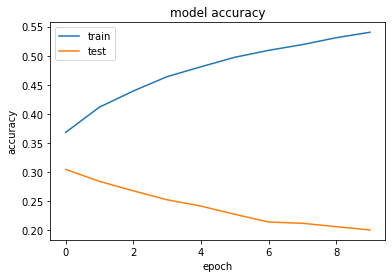

In [20]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left');

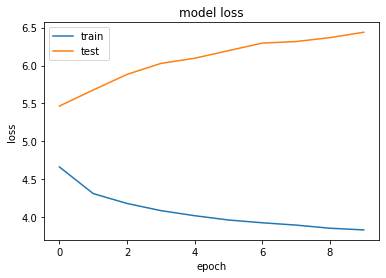

In [18]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left');

In [15]:
#Buuild LSTM Network
model = Sequential()
model.add(LSTM(128, input_shape=(WORD_LENGTH, len(unique_words))))
model.add(Dense(len(unique_words)))
model.add(Activation('softmax'))

#Train LTM network
optimizer = RMSprop(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(X, Y, validation_split=0.30, batch_size=128, epochs=10, shuffle=True).history

model.save('keras_next_word_model.h5')
pickle.dump(history, open("history.p", "wb"))

model = load_model('keras_next_word_model.h5')
history = pickle.load(open("history.p", "rb"))

Train on 90015 samples, validate on 38578 samples
Epoch 1/10
90015/90015 [==============================] - 172s 2ms/step - loss: 5.6755 - accuracy: 0.1497 - val_loss: 5.5835 - val_accuracy: 0.1670
Epoch 2/10
90015/90015 [==============================] - 170s 2ms/step - loss: 5.2637 - accuracy: 0.2054 - val_loss: 6.0205 - val_accuracy: 0.1755
Epoch 3/10
90015/90015 [==============================] - 171s 2ms/step - loss: 5.3022 - accuracy: 0.2400 - val_loss: 6.1535 - val_accuracy: 0.1854
Epoch 4/10
90015/90015 [==============================] - 174s 2ms/step - loss: 5.0384 - accuracy: 0.2794 - val_loss: 6.2391 - val_accuracy: 0.1729
Epoch 5/10
90015/90015 [==============================] - 169s 2ms/step - loss: 4.7053 - accuracy: 0.3226 - val_loss: 6.3380 - val_accuracy: 0.1648
Epoch 6/10
90015/90015 [==============================] - 169s 2ms/step - loss: 4.4142 - accuracy: 0.3661 - val_loss: 6.4558 - val_accuracy: 0.1675
Epoch 7/10
90015/90015 [==============================] - 171s

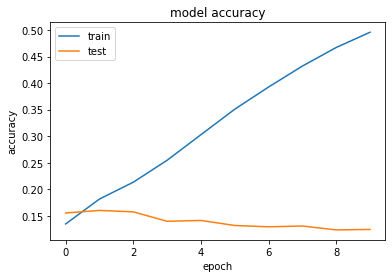

In [24]:

plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left');

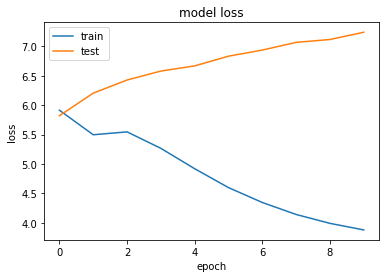

In [25]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left');

In [0]:
#Avaluate a model
def prepare_input(text):
    x = np.zeros((1, WORD_LENGTH, len(unique_words)))
    for t, word in enumerate(text.split()):
        print(word)
        x[0, t, unique_word_index[word]] = 1
    return x

def sample(preds, top_n=3):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds)
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)

    return heapq.nlargest(top_n, range(len(preds)), preds.take)


def predict_completions(text, n=3):
    if text == "":
        return("0")
    x = prepare_input(text)
    preds = model.predict(x, verbose=0)[0]
    next_indices = sample(preds, n)
    return [unique_words[idx] for idx in next_indices]

In [28]:
q =  "have seldom heard him mention her under any other name"
print("correct sentence: ", q)
seq = " ".join(nltk.tokenize.word_tokenize(q.lower())[0:5])
print("Sequence: ",seq)
print("next possible words: ", predict_completions(seq, 5))

correct sentence:  have seldom heard him mention her under any other name
Sequence:  have seldom heard him mention
have
seldom
heard
him
mention
next possible words:  ['her', 'of', 'him', 'some', 'would']
